In [1]:
from matplotlib import pyplot as plt
import numpy as np
plt.style.use('seaborn-notebook')
plt.rcParams["axes.grid"] = False

In [3]:
precision = {'baseline':[0.83, 0.71, 0.64, 0.64, 0.46, 0.53, 0.32],
             'BERT': [0.87, 0.67, 0.67, 0.66, 0.54, 0.45, 0.37],
             'BERT+LSTM': [0.89, 0.64, 0.66, 0.69, 0.53, 0.46, 0.42],
             'BERT+CNN': [0.80, 0.70, 0.65, 0.74, 0.50, 0.44, 0.43]}
recall = {'baseline':[0.63, 0.46, 0.82, 0.85, 0.76, 0.70, 0.68],
             'BERT': [0.64, 0.53, 0.79, 0.87, 0.78, 0.73, 0.64],
             'BERT+LSTM': [0.62, 0.60, 0.81, 0.80, 0.76, 0.69, 0.61],
             'BERT+CNN': [0.70, 0.50, 0.80, 0.81, 0.74, 0.72, 0.58]}  
f1 = {'baseline':[0.72, 0.56, 0.72, 0.73, 0.57, 0.60, 0.44],
             'BERT': [0.74, 0.59, 0.73, 0.75, 0.64, 0.56, 0.47],
             'BERT+LSTM': [0.73, 0.62, 0.73, 0.74, 0.62, 0.55, 0.49],
             'BERT+CNN': [0.74, 0.58, 0.71, 0.77, 0.60, 0.54, 0.50]}  


In [10]:
def model_performance(metric, name):
    label_name = ['not related or not informative', 'other useful information', 'donations and volunteering',
              'affected individuals', 'sympathy and support', 'infrastructure and utilities damage',
              'caution and advice']
    model = ['baseline', 'BERT', 'BERT+LSTM', 'BERT+CNN']
    fig, ax=plt.subplots(figsize=(8, 12))
    m = np.array([metric['baseline'], metric['BERT'], metric['BERT+LSTM'],  metric['BERT+CNN']])
    im=ax.imshow(m, cmap='Blues', vmin=0, vmax=1)
#     ax.figure.colorbar(im, ax=ax)
    ax.set_xlabel('class', size=12)
    ax.set_ylabel('model', size=12)
    ax.set_yticks(range(0,m.shape[0]))
    ax.set_xticks(range(0,m.shape[1]))
    ax.set_yticklabels(model)
    ax.set_xticklabels(label_name)
    plt.setp(ax.get_xticklabels(), size=12, rotation=45, ha="right",
             rotation_mode="anchor")
    plt.setp(ax.get_yticklabels(), size=12)
    
    for i in range(m.shape[0]):
        for j in range(m.shape[1]):
            ax.text(j, i, format(m[i, j], '.2f'),
                    ha="center", va="center",
                    color="white") # if m[i, j] > 0.4 else "black")
    fig.tight_layout()
    ax.set_title(name, size=12)
    plt.show()

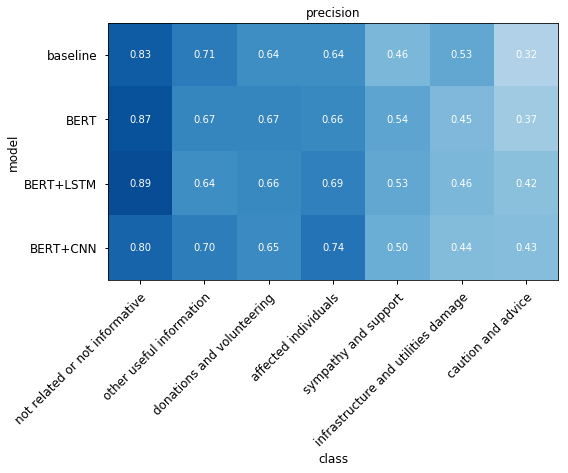

In [11]:
model_performance(precision, 'precision')

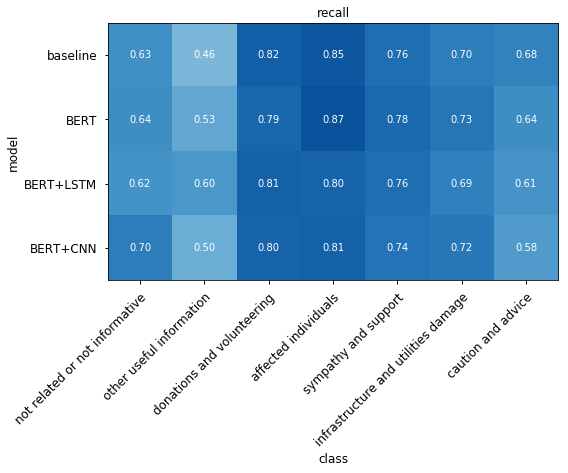

In [12]:
model_performance(recall, 'recall')

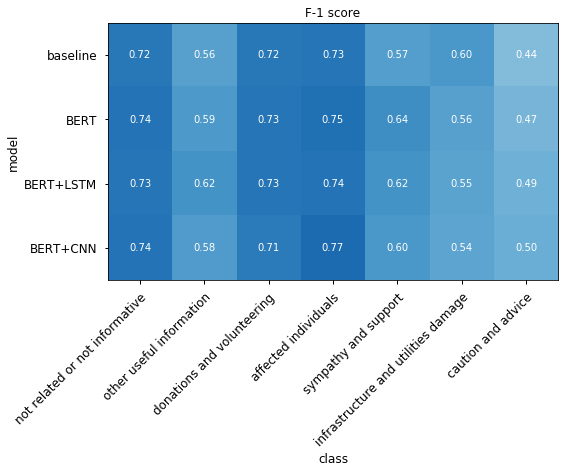

In [13]:
model_performance(f1, 'F-1 score')